<a href="https://colab.research.google.com/github/CranalLizze/IBM/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

####The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

####Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
###For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**To Determine**
#### Analysing the customer profile for each AeroFir treadmil product by devoloping appropriate tables and charts.
####computing all conditional marginal probabilities with their impact on the business.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
  df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.shape

(180, 9)

In [7]:
df.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [8]:
df.Age.value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [9]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [10]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [13]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [14]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [15]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [17]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

##**Insights**

1.There is no missing or null values in any of the coloumn.

2.Comparing the gender, male tends to buy AeroFit more than women.

3.KP281 is the more successful product.

4.Married people buys AeroFit more than single people.

# **Boxplot to detect the Outliers**

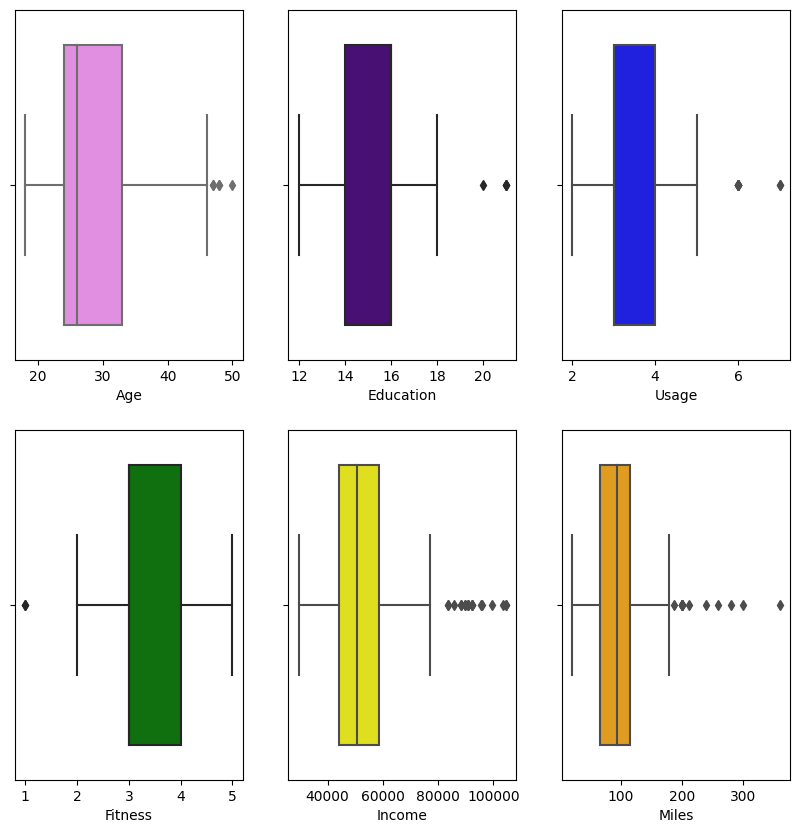

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

sns.boxplot(data=df, x="Age", color = "violet", ax=axis[0,0])
sns.boxplot(data=df, x="Education", color = "indigo", ax=axis[0,1])
sns.boxplot(data=df, x="Usage", color = "blue", ax=axis[0,2])
sns.boxplot(data=df, x="Fitness", color = "green", ax=axis[1,0])
sns.boxplot(data=df, x="Income", color = "yellow", ax=axis[1,1])
sns.boxplot(data=df, x="Miles", color = "orange", ax=axis[1,2])
plt.show()

##**Insights**



1.   There are few outlier in Age, Education, Usage and Fitness.
2.   There are many outlier in customers with higher income and customers who walks an extra miles.


#**Checking whether the marital Status or Age has any effect on their buying decisions.**

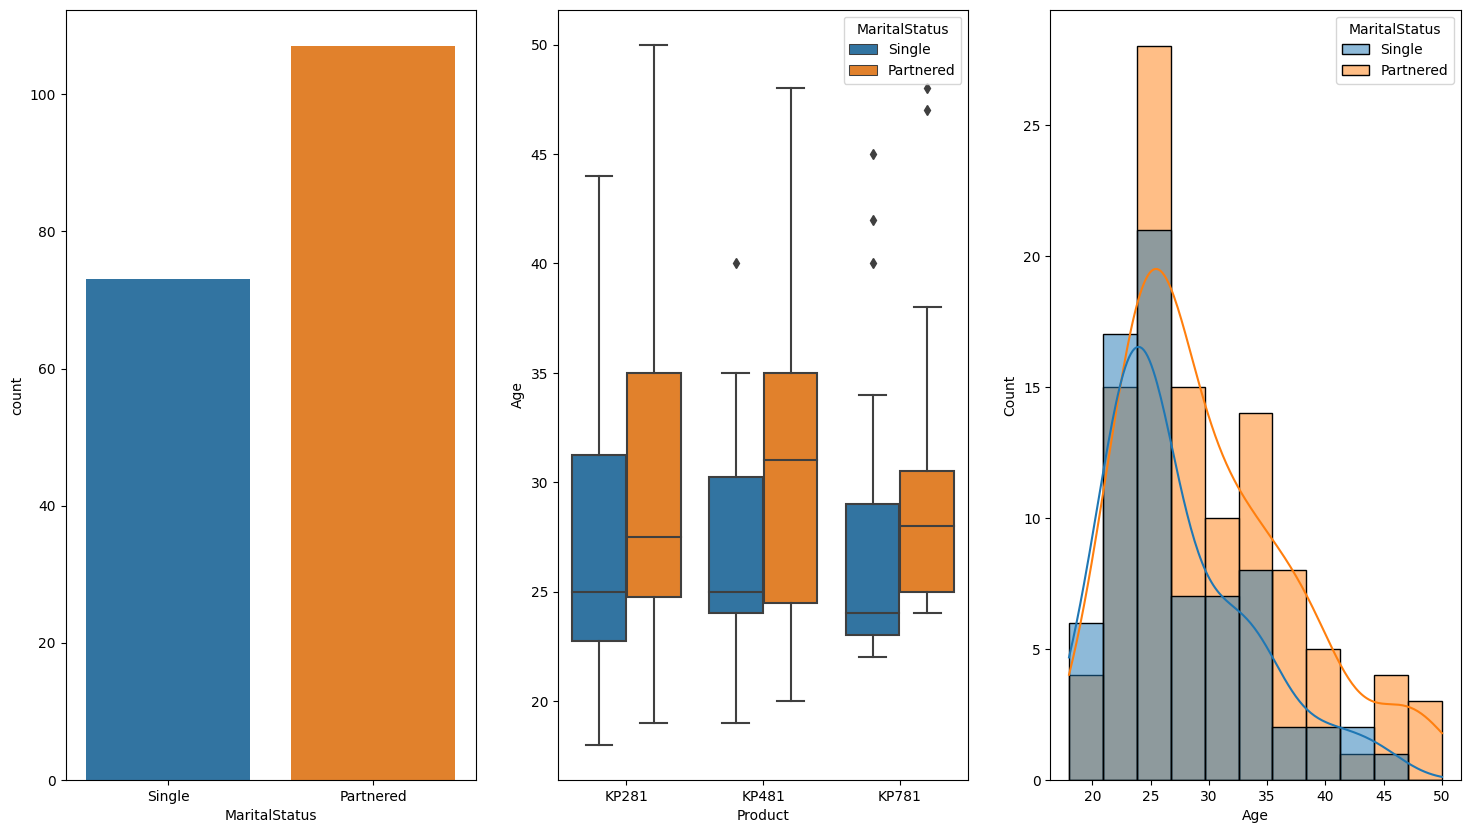

In [19]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))

sns.countplot(data=df, x='MaritalStatus', ax=axis[0])
sns.boxplot(data=df,x='Product', y='Age', hue='MaritalStatus', ax=axis[1])
sns.histplot(data=df, x="Age", hue='MaritalStatus', kde=True, ax=axis[2])
plt.show()

##**Insights**


1.   People with patners tends to buy more than single people.
2.   All the three Aerifit treadmils are bought by married people than single people
3.   Customers ages between 24 and 30 tends to buy more.



#**Marginal probability for the percentage of people buying KP281, KP481, or KP781**

In [20]:
pd.crosstab(index=df["Gender"],
 columns=df["Product"],
 margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [21]:
KP281_buyers = (len(df.loc[df["Product"]=="KP281"]))/(len(df)) * 100
KP481_buyers = (len(df.loc[df["Product"]=="KP481"]))/(len(df)) * 100
KP781_buyers = (len(df.loc[df["Product"]=="KP781"]))/(len(df)) * 100
print("\n","KP281_buyers are ", round(KP281_buyers,2),"%", "\n","KP281_buyers are ", round(KP481_buyers,2),"%", "\n","KP281_buyers are ", round(KP781_buyers,2),"%")


 KP281_buyers are  44.44 % 
 KP281_buyers are  33.33 % 
 KP281_buyers are  22.22 %


##**Insights**


1.   44.44% of the customers have purchased KP2821 product. Men and women bought the exactly same.
2.   33.33% of the customers have purchased KP481 product.
3.   22.22% of the customers have purchased KP781 product.

#**Correlation among different factors using heat maps or pair plots**

<ipython-input-22-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


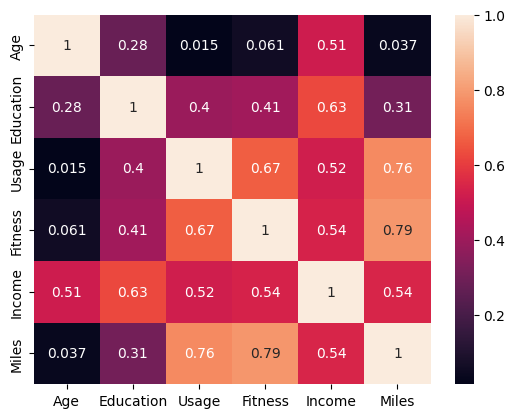

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

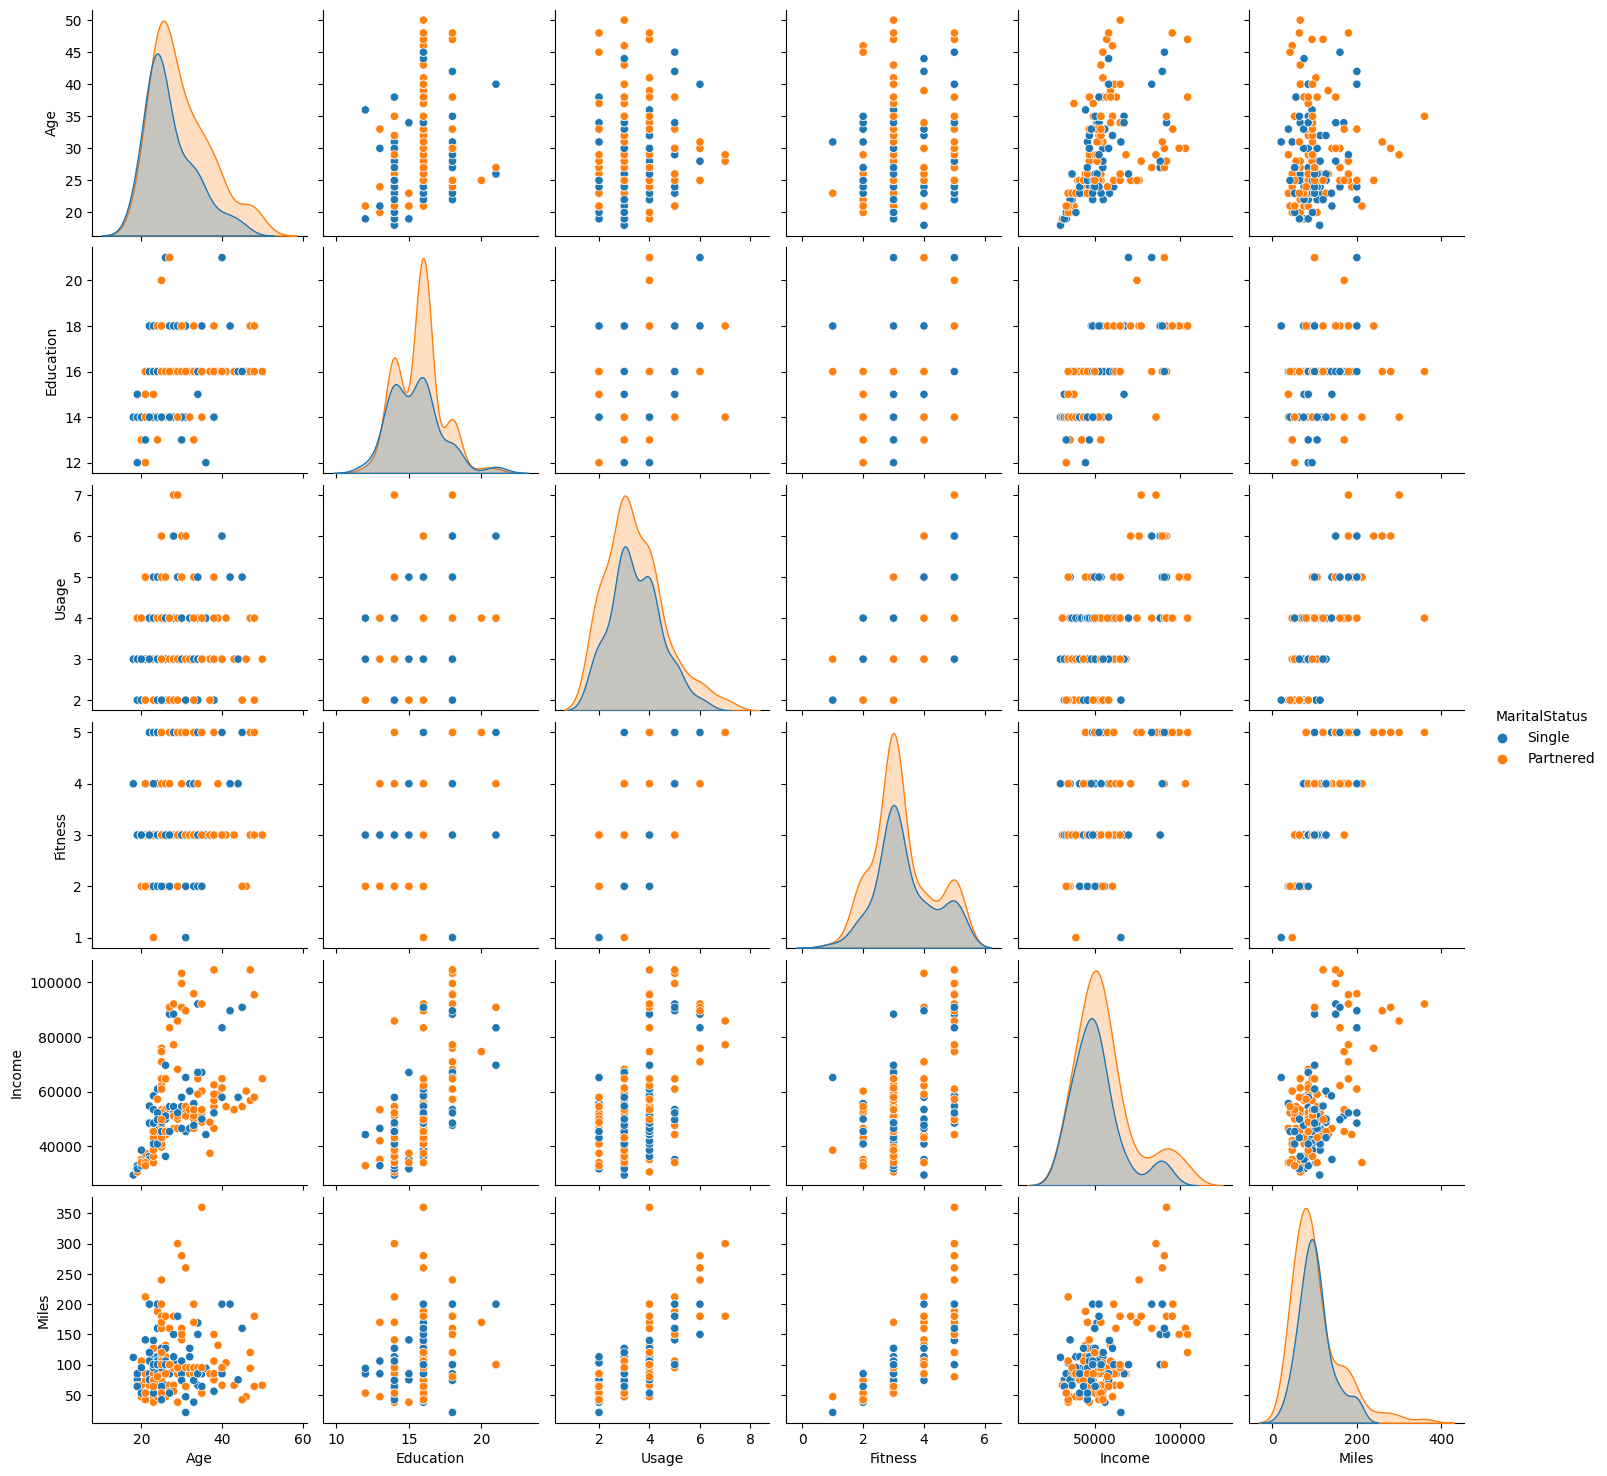

In [23]:
sns.pairplot(data=df, hue ="MaritalStatus")
plt.show()

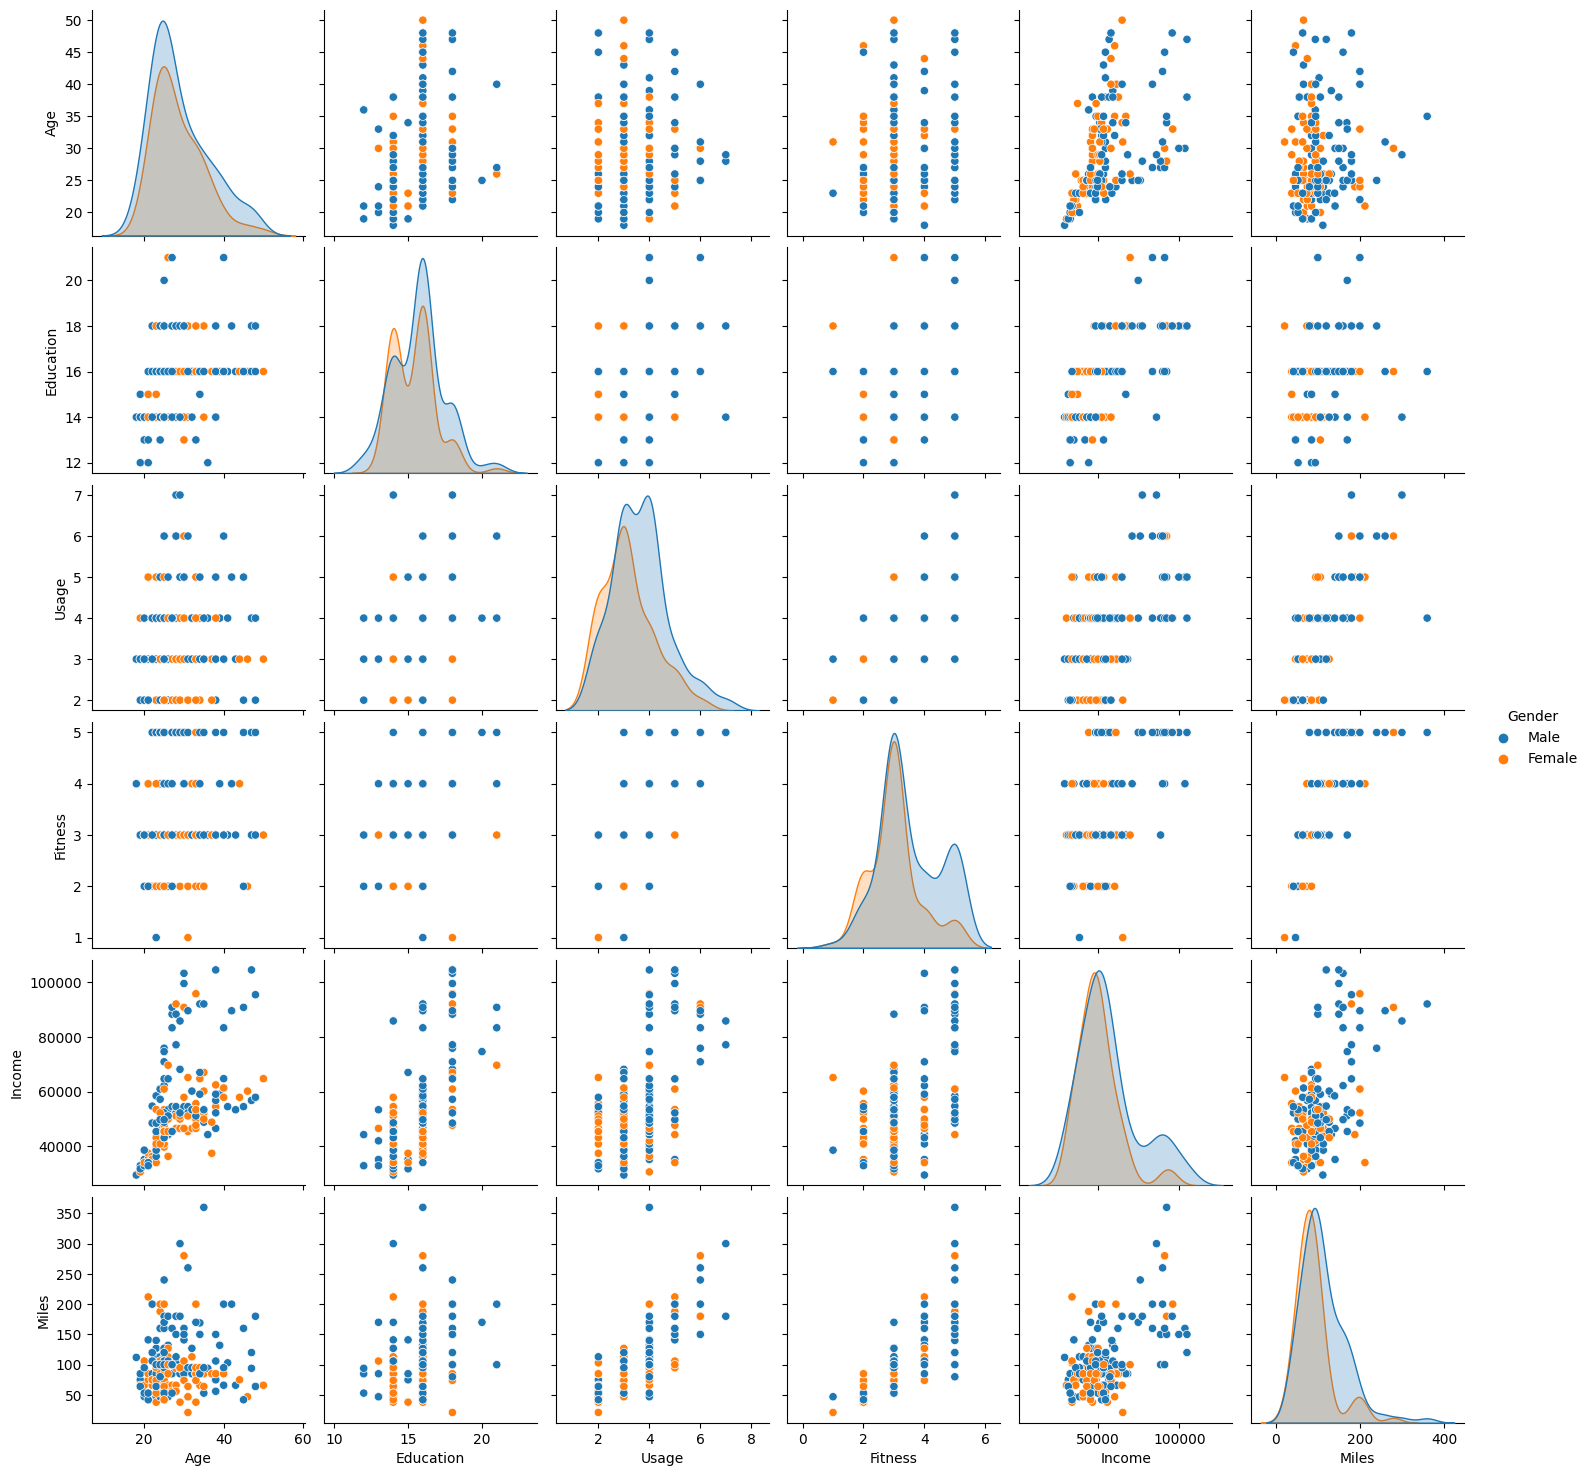

In [24]:
sns.pairplot(data=df, hue ="Gender")

#**Customer Profiling**


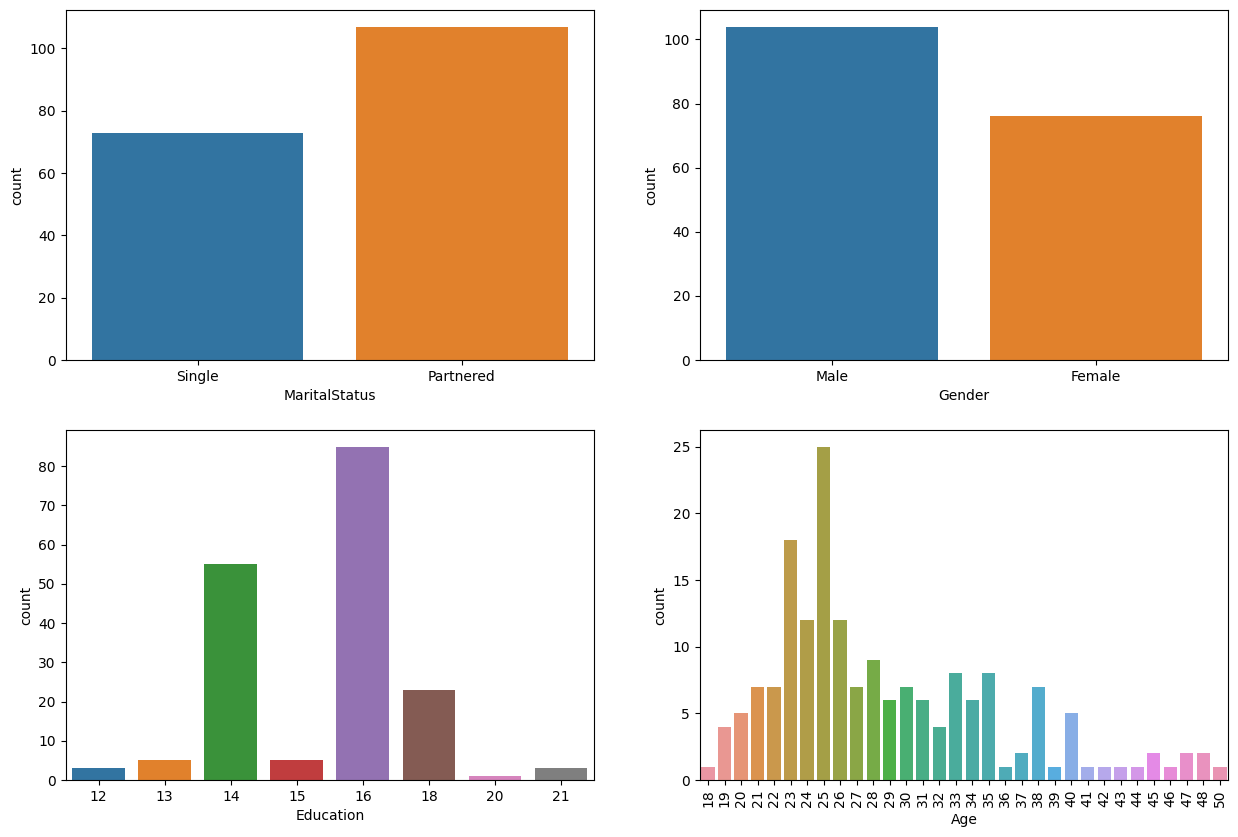

In [25]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.countplot(data=df, x='MaritalStatus', ax=axis[0,0])
sns.countplot(data=df, x='Gender', ax=axis[0,1])
sns.countplot(data=df, x='Education', ax=axis[1,0])
sns.countplot(data=df, x='Age', ax=axis[1,1])
plt.xticks(rotation=90)
plt.show()

In [26]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
round((df1.groupby(['variable', 'value'])[['value']].count() / len(df))*100,2)

value
variable      value           
Gender        Female     42.22
              Male       57.78
MaritalStatus Partnered  59.44
              Single     40.56
Product       KP281      44.44
              KP481      33.33
              KP781      22.22

#**Conditional probability**

In [27]:
def prob_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

prob_gender('Male', True)
prob_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



#**The probability of male buying KP781**

In [28]:
pd.crosstab(index=df["Gender"],
 columns=df["Product"],
 margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [29]:
print("The percentage of male buying KP781 is", (len(df.loc[(df["Gender"]=="Male") & (df["Product"]=="KP781")])/(len(df.loc[df["Product"]=="KP781"])))*100)

The percentage of male buying KP781 is 82.5


#**Recommandations**

>Male and female shows similar intrest in buying KP281 and KP481 whereas KP781 having advanced features is more appealing to men. Adding few features that are apealing to women may encourage female users to buy KP781.


>People between the age of 24 and 29 and are married are likely to buy aerofit treadmil. Therefore, to target customer in this range will increase the sales.


>Higher chance of customer buying KP781 if their income is greater than 60000.